<a href="https://colab.research.google.com/github/TazinMorshed/Deep-learning/blob/main/Keras_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

In [3]:
try: 
  del train_data, train_label
  del test_data, test_label
  print('Clear previously loaded data')
except:
  pass

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
train_data[0]

In [5]:
import numpy as np

In [17]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    
    results[i,sequence] = 1 
  return results 

X_train  = vectorize_sequences(train_data)
X_test   = vectorize_sequences(test_label)



In [18]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [19]:
##Input vector ## Test 0/1 data best case possible
##In these cases yse simple stack of fully connnected (dense) layer wuth relU activations

##Dense(16,activation = relu) basic 

##Here 16 means 16 hidden units output = relu(dot(W, input) + bias)
##So, the dot product of input with 'W' will project the input onto a 16 dimensional 
#representation space, then we will add the bias vector b and apply relu activation


## Now , having more hidden units meaning higher representational space this will
## allow our model to learn more complex representation, but this is computationally 
## expensive and *most importantly, this will improve performance on the traning data
## but not on test data SO OVERFITTING.

In [21]:
##### Important question to ask
## How many layers to use 
## How many hidden unit to chose for each layer

##### THE DECISION
## Two intermediate layer with 16 hidden units each
## A third layer that will output the scalar prediction from the current data.

# The intermediate layer will use relu as their activation function and the
# third layer/final layer will use a sigmoid function so that output is a probablity. 

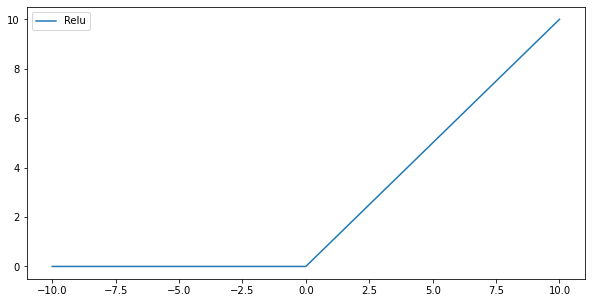

In [25]:
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()


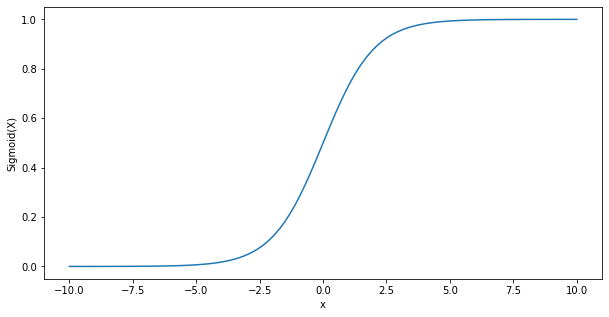

In [26]:
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(10, 5))  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [29]:
# Now what will the model look like, 

from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Now that we have a model in hand, we now have to choose a loss function and an optimizer. 



In [30]:
'Since this is an binary classificaiton problem,(output either yes/no) its best to use'
## Binary_crossentropy loss function, we could use mean_sqaure_error as well.
##Crossentropy is usually the best choice when dealing with models that outputs probablity.

# WE are using rmsprop as optimizer (look into this)
# and binary crossentropy as loss function

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Configuring the optimizer 


In [36]:
from keras import optimizers 

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics= ['accuracy']) 

Using custom Losses and metrics


In [38]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

#Creating a validation set


In [49]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
X_train.shape

(25000, 10000)

In [50]:
x_val.shape

(10000, 10000)

In [51]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training out *Model*

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


# You’ll now train the model for 20 epochs (20 iterations over all samples in the
# x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
# you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
# passing the validation data as the validation_data argument.

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.0187 - acc: 0.9948 - val_loss: 0.7288 - val_acc: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0036 - acc: 0.9999 - val_loss: 0.7675 - val_acc: 0.8641
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.8125 - val_acc: 0.8633
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.8445 - val_acc: 0.8617
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.8774 - val_acc: 0.8624
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.8970 - val_acc: 0.8610
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0017 - acc: 0.9998 - val_loss: 0.9328 - val_acc: 0.8604
Epoch 8/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0010 - a

##Plotting the traning and validation loss 


In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

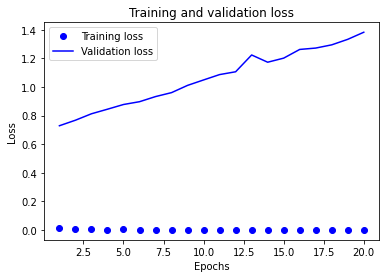

In [68]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Plotting the traning and validation accuracy

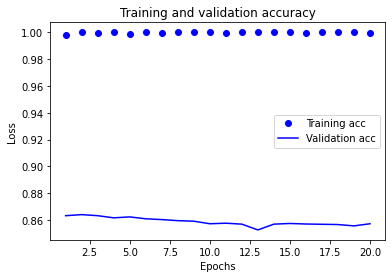

In [67]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
val_acc = history.history['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
## clearly overfitting